# Taylorův rozvoj a jeho vizualizace

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Funkce sinus a jeho aproximace

In [3]:
def factorial(n):
    """Vypočítá faktoriál čísla n."""
    return math.factorial(n)

In [4]:
def taylor_sin_aprox_1(x):
    """1. řád taylorova rozvoje pro funkci sinus"""
    return x - x**3/factorial(3)

In [5]:
def taylor_sin_aprox_2(x):
    """2. řád taylorova rozvoje pro funkci sinus"""
    return x - x**3/factorial(3) + x**5/factorial(5)

In [6]:
def taylor_sin_aprox_3(x):
    """3. řád taylorova rozvoje pro funkci sinus"""
    return x - x**3/factorial(3) + x**5/factorial(5) - x**7/factorial(7)

In [7]:
x_values = np.linspace(-2*np.pi, 2*np.pi, 400)
x_values_taylor = np.linspace(-np.pi, np.pi, 200)
y_true_sin = np.sin(x_values)
y_true_sin_taylor = np.sin(x_values_taylor)

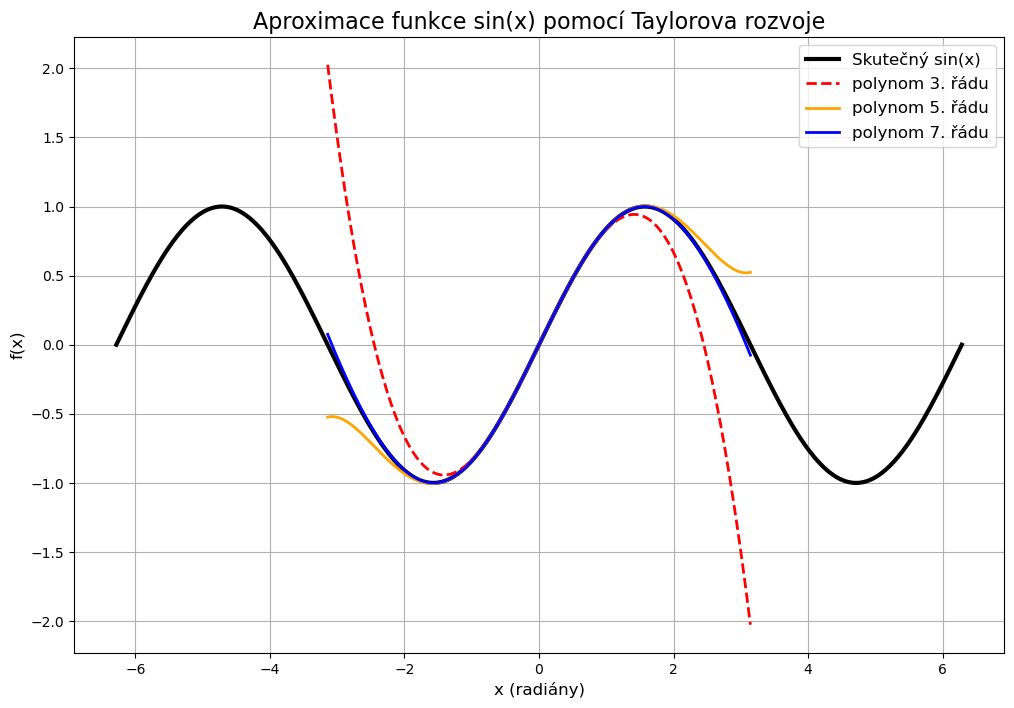

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(x_values, y_true_sin, 'k-', linewidth=3, label='Skutečný sin(x)')
plt.plot(x_values_taylor, taylor_sin_aprox_1(x_values_taylor),'r--', linewidth=2, label='polynom 3. řádu' )
plt.plot(x_values_taylor, taylor_sin_aprox_2(x_values_taylor),'orange', linewidth=2, label='polynom 5. řádu' )
plt.plot(x_values_taylor, taylor_sin_aprox_3(x_values_taylor),'blue', linewidth=2, label='polynom 7. řádu' )
plt.title('Aproximace funkce sin(x) pomocí Taylorova rozvoje', fontsize=16)
plt.xlabel('x (radiány)', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

## Vizualizace chyby aproximace

In [9]:
x1 = abs(taylor_sin_aprox_1(x_values_taylor) - y_true_sin_taylor)
x2 = abs(taylor_sin_aprox_2(x_values_taylor) - y_true_sin_taylor)
x3 = abs(taylor_sin_aprox_3(x_values_taylor) - y_true_sin_taylor)

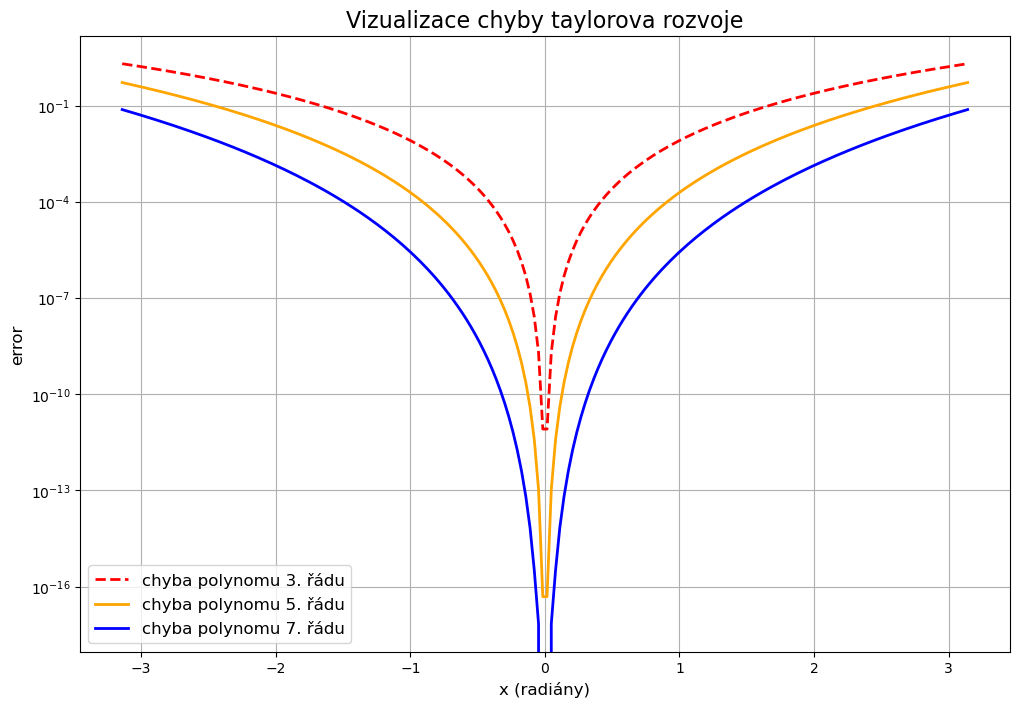

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(x_values_taylor, x1,'r--', linewidth=2, label='chyba polynomu 3. řádu' )
plt.plot(x_values_taylor, x2,'orange', linewidth=2, label='chyba polynomu 5. řádu' )
plt.plot(x_values_taylor, x3,'blue', linewidth=2, label='chyba polynomu 7. řádu' )
plt.title('Vizualizace chyby taylorova rozvoje', fontsize=16)
plt.xlabel('x (radiány)', fontsize=12)
plt.ylabel('error', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.yscale('log')
plt.show()

## Taylorův rozvoj funkce ln(x)

In [11]:
def natural_log_taylor(x, n):
    """
    Vypočítá Taylorův rozvoj pro přirozený logaritmus se středem v a=1.
    x: argument funkce
    n: počet členů řady, které se mají sečíst (řád polynomu je také n)
    """
    approximation = 0.0
    
    for i in range(1, n + 1):
        power_term = (x - 1)**i
        sign = (-1)**(i + 1)
        term = sign * power_term / i
        
        approximation += term
        
    return approximation

x_value = 1.5
n_terms = 5 

my_result = natural_log_taylor(x_value, n_terms)
true_result = np.log(x_value)

print(f"Test pro x = {x_value} a n = {n_terms} členů:")
print(f"Můj výsledek:      {my_result}")
print(f"Skutečná hodnota:  {true_result}")
print(f"Chyba:             {abs(my_result - true_result)}")

Test pro x = 1.5 a n = 5 členů:
Můj výsledek:      0.40729166666666666
Skutečná hodnota:  0.4054651081081644
Chyba:             0.001826558558502278


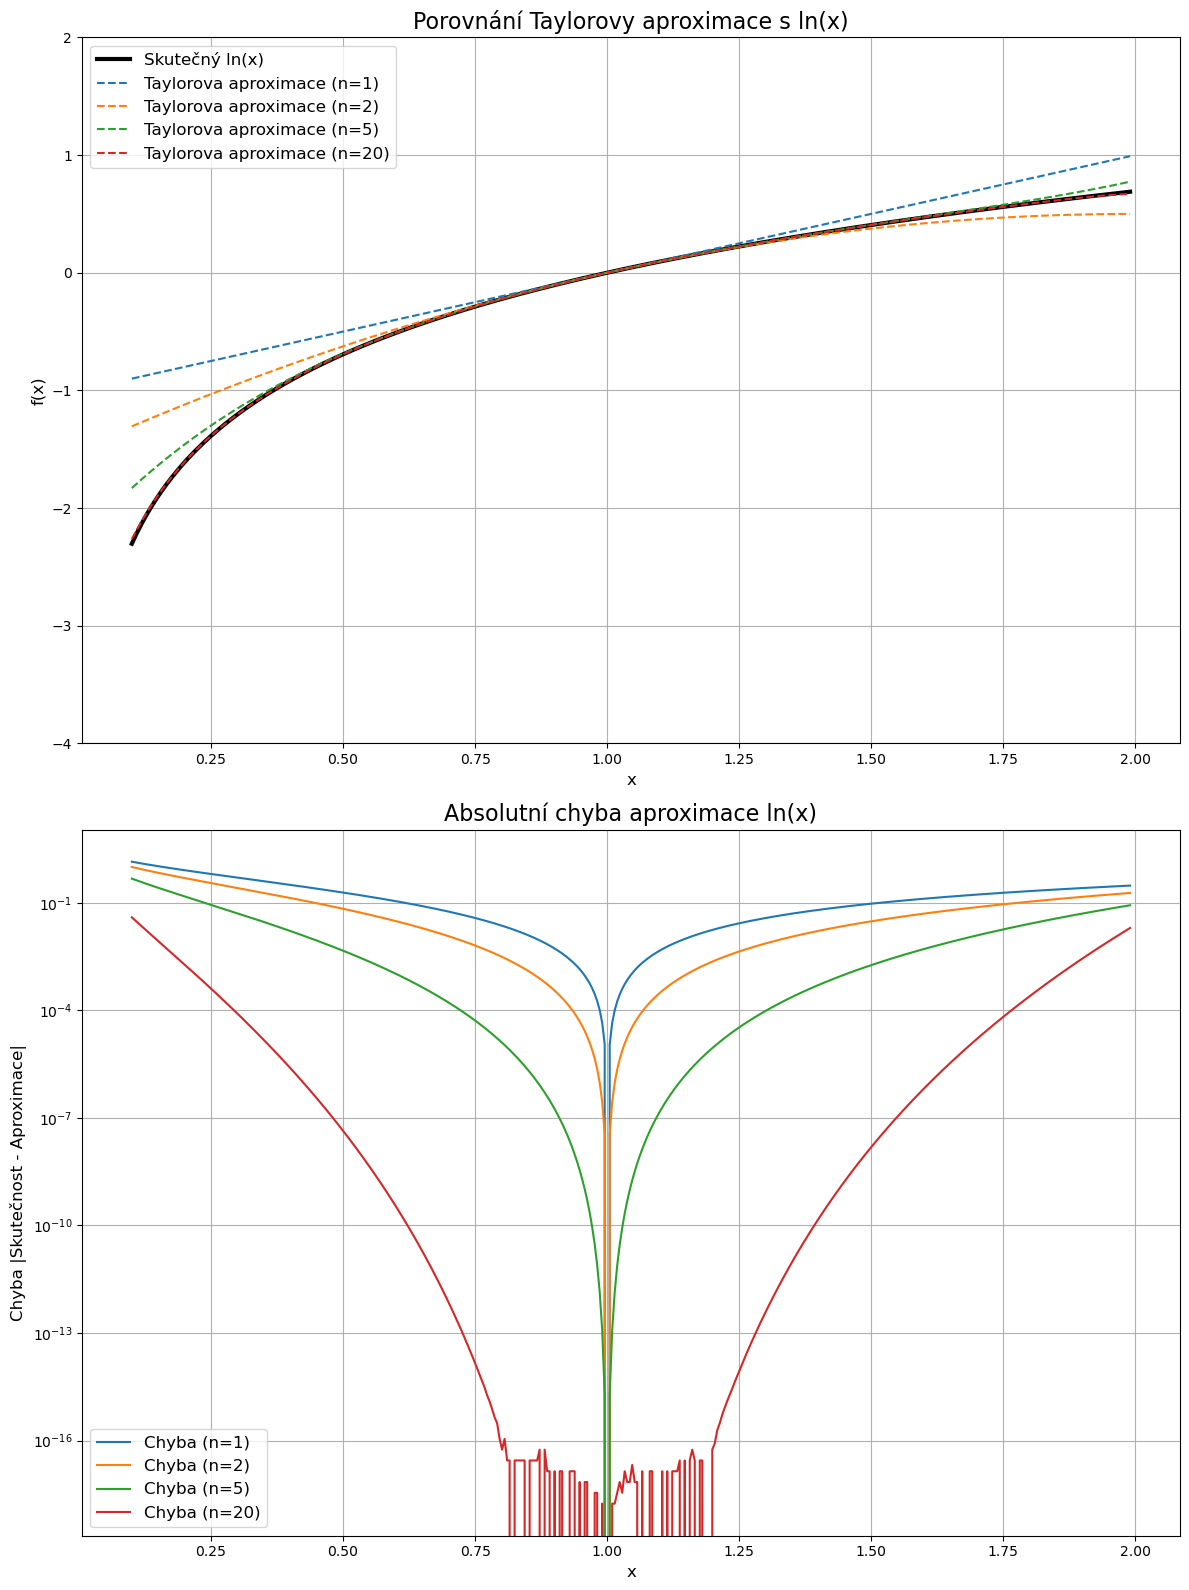

In [12]:
x_values = np.linspace(0.1, 1.99, 400)

y_true_log = np.log(x_values)

orders_to_plot = [1, 2, 5, 20]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

ax1.set_title('Porovnání Taylorovy aproximace s ln(x)', fontsize=16)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('f(x)', fontsize=12)
ax1.grid(True)

ax1.plot(x_values, y_true_log, color='black', linewidth=3, label='Skutečný ln(x)')

for n in orders_to_plot:
    y_approx = natural_log_taylor(x_values, n)
    ax1.plot(x_values, y_approx, '--', label=f'Taylorova aproximace (n={n})')

ax1.set_ylim(-4, 2)
ax1.legend(fontsize=12)

# --- Dolní graf: Vizualizace chyby ---

ax2.set_title('Absolutní chyba aproximace ln(x)', fontsize=16)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('Chyba |Skutečnost - Aproximace|', fontsize=12)
ax2.grid(True)

# V cyklu vykreslíme chyby pro různé řády
for n in orders_to_plot:
    y_approx = natural_log_taylor(x_values, n)
    error = np.abs(y_true_log - y_approx)
    ax2.plot(x_values, error, label=f'Chyba (n={n})')

# KLÍČOVÝ KROK: Použijeme logaritmickou škálu na ose y, abychom viděli i velmi malé chyby
ax2.set_yscale('log')
ax2.legend(fontsize=12)


# --- 3. ZOBRAZENÍ VÝSLEDKU ---

# Zajistí, aby se popisky a titulky nepřekrývaly
plt.tight_layout()

# Zobrazí finální okno s oběma grafy
plt.show()